In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Student_performance_data _.csv")  

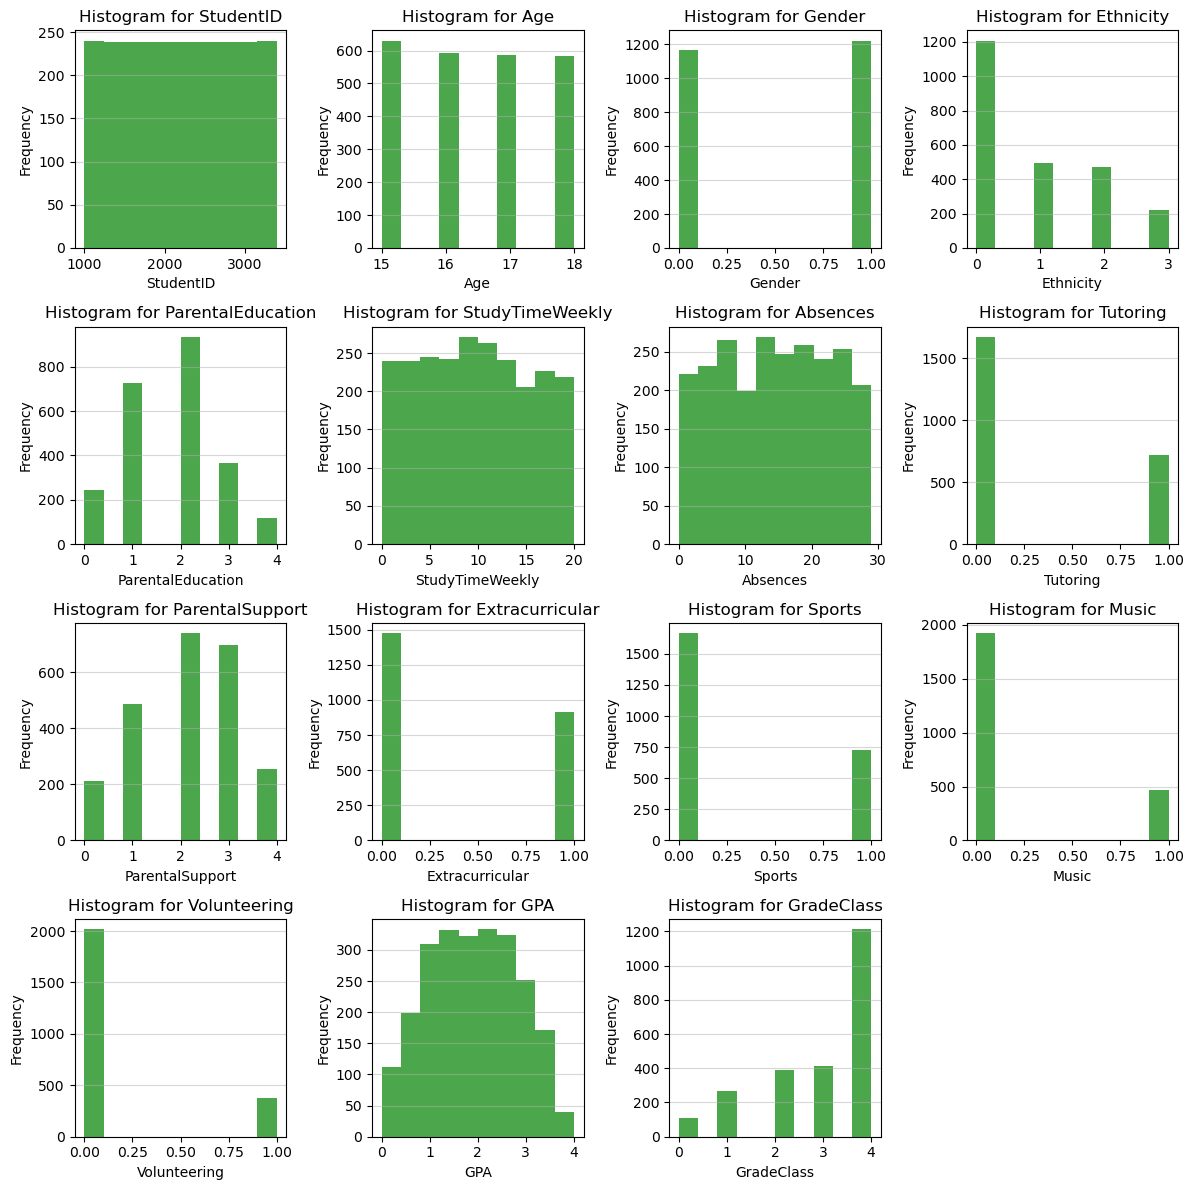

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load the dataset
df = pd.read_csv("Student_performance_data _.csv")  # Ensure correct file path

# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Plot histograms for numerical columns in a **4-column grid**
n_num = len(num_cols)
N_X = 4  # Set fixed columns to 4
N_Y = math.ceil(n_num / N_X)  # Determine required rows dynamically

fig, axes = plt.subplots(N_Y, N_X, figsize=(12, 3 * N_Y))  # Adjust width/height accordingly
axes = axes.flatten()  # Flatten axes for easier iteration

for idx, column in enumerate(num_cols):
    ax = axes[idx]
    ax.hist(df[column], bins=10, color='green', alpha=0.7)
    ax.set_title(f"Histogram for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', alpha=0.5)

# Hide empty subplots if number of features isn't a perfect multiple of 4
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])  

plt.tight_layout()
plt.show()

# Summarize unique values for categorical columns
for column in cat_cols:
    print(f"Unique values in {column}:")
    print(df[column].value_counts())
    print("\n")


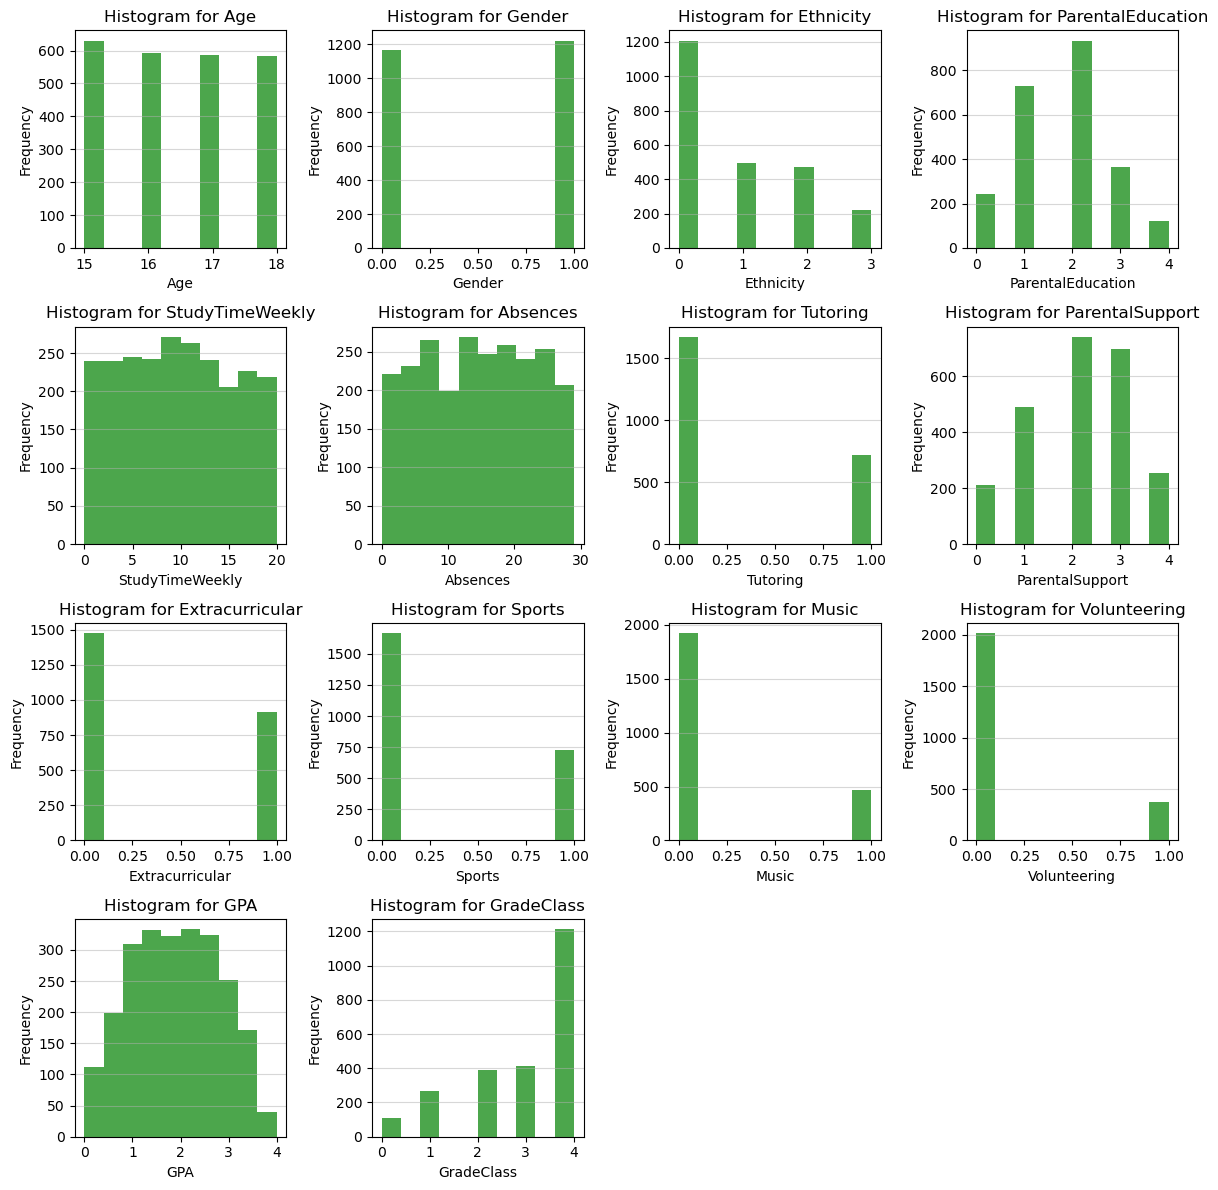

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load the dataset
df = pd.read_csv("Student_performance_data _.csv")  # Ensure correct file path

# Drop the StudentID column (assuming it's named "StudentID")
df = df.drop(columns=["StudentID"], errors="ignore")  # `errors="ignore"` prevents errors if column doesn't exist

# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Plot histograms for numerical columns in a **4-column grid**
n_num = len(num_cols)
N_X = 4  # Fixed number of columns
N_Y = math.ceil(n_num / N_X)  # Dynamically calculate required rows

fig, axes = plt.subplots(N_Y, N_X, figsize=(12, 3 * N_Y))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for iteration

for idx, column in enumerate(num_cols):
    ax = axes[idx]
    ax.hist(df[column], bins=10, color="green", alpha=0.7)
    ax.set_title(f"Histogram for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.grid(axis="y", alpha=0.5)

# Hide empty subplots if the number of features isn't a perfect multiple of 4
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])  

plt.tight_layout()
plt.show()

# Summarize unique values for categorical columns
for column in cat_cols:
    print(f"Unique values in {column}:")
    print(df[column].value_counts())
    print("\n")


Classes found: [0.0, 1.0, 2.0, 3.0, 4.0]
Found 13 numerical features. Creating grid of 4 by 4


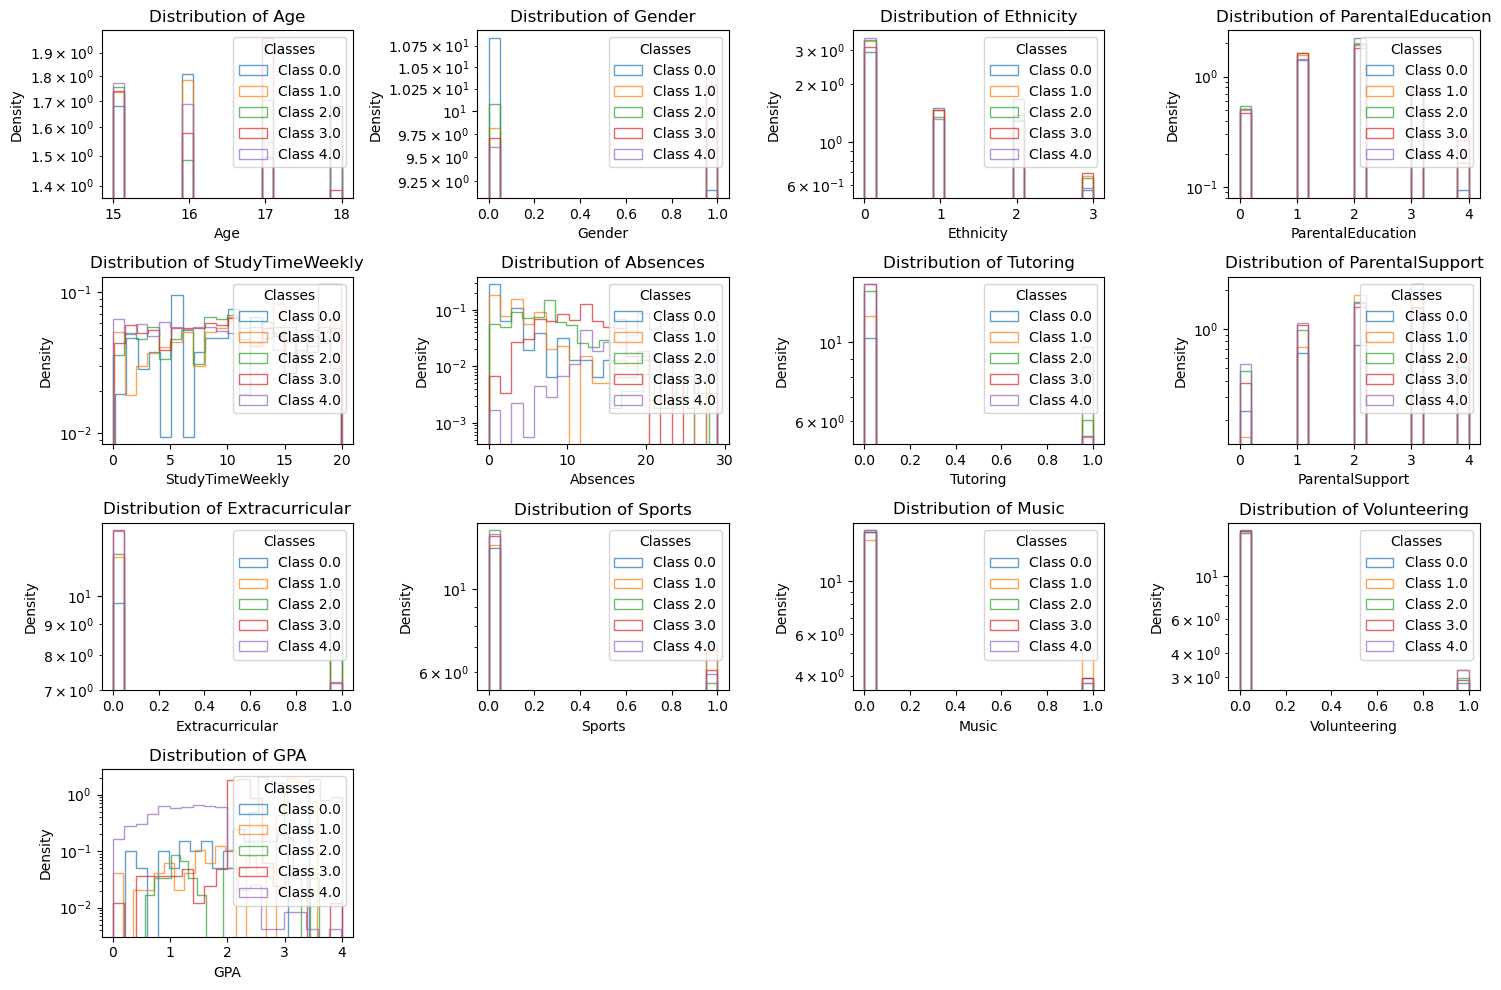

In [3]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("Student_performance_data _.csv")  # Ensure correct file path

# Drop StudentID column (ignores error if it doesn't exist)
df = df.drop(columns=["StudentID"], errors="ignore")

# Identify all numerical columns dynamically
numerical_features = df.select_dtypes(include=["number"]).columns.tolist()
target_column = "GradeClass"  # Replace with actual target column

# Ensure target column is numerical
if target_column not in numerical_features:
    print(f"Error: Target column '{target_column}' is not numerical. Please check the dataset.")
    raise ValueError("Target column must be numerical.")

# Remove target column from features to avoid redundancy in plotting
numerical_features.remove(target_column)

# Function to compare numerical features across all classes
def compare_features_multiclass(data, logscale=False):
    classes = sorted(data[target_column].unique())  
    print("Classes found:", classes)

    # Determine grid size for plotting
    N_Features = len(numerical_features)
    N_X = math.ceil(math.sqrt(N_Features))
    N_Y = math.ceil(N_Features / N_X)

    print(f"Found {N_Features} numerical features. Creating grid of {N_X} by {N_Y}")

    # Initialize plot for numerical feature distributions
    plt.figure(figsize=(15, 10))

    for i, column in enumerate(numerical_features):
        plt.subplot(N_X, N_Y, i + 1)
        plt.title(f"Distribution of {column}")

        # Plot histogram for each class
        for grade_class in classes:
            subset = data[data[target_column] == grade_class]
            plt.hist(
                subset[column], 
                bins=20, 
                histtype="step", 
                alpha=0.7, 
                label=f"Class {grade_class}", 
                density=True
            )

        if logscale:
            plt.yscale("log")

        plt.xlabel(column)
        plt.ylabel("Density")
        plt.legend(title="Classes")

    plt.tight_layout()
    plt.show()

# Call the function
compare_features_multiclass(df, logscale=True)


Classes found: [0.0, 1.0, 2.0, 3.0, 4.0]
Found 14 numerical features. Creating grid of 4 by 4


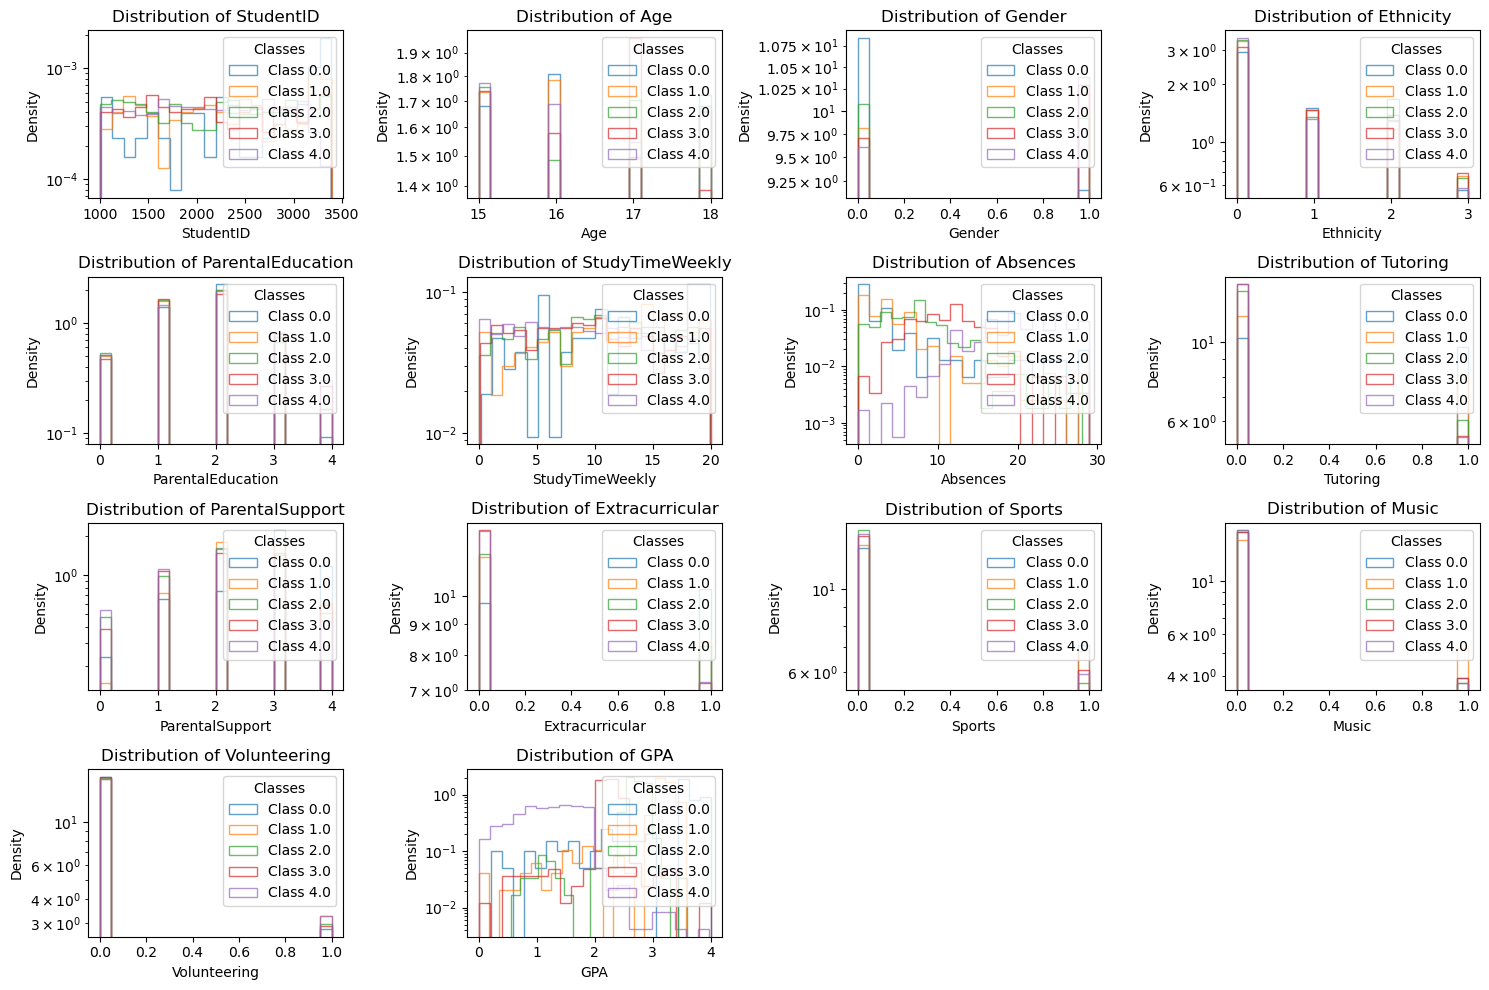

In [6]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("Student_performance_data _.csv")  # Replace with your file path

# Identify all numerical columns dynamically
numerical_features = df.select_dtypes(include=["number"]).columns.tolist()
target_column = "GradeClass"  # Replace with actual target column

# Ensure target column is numerical
if target_column not in numerical_features:
    print(f"Error: Target column '{target_column}' is not numerical. Please check the dataset.")
    raise ValueError("Target column must be numerical.")

# Remove target column from features to avoid redundancy in plotting
numerical_features.remove(target_column)

# Function to compare numerical features across all classes
def compare_features_multiclass(data, logscale=False):
    classes = sorted(data[target_column].unique())  
    print("Classes found:", classes)

    # Determine grid size for plotting
    N_Features = len(numerical_features)
    N_X = math.ceil(math.sqrt(N_Features))
    N_Y = math.ceil(N_Features / N_X)

    print(f"Found {N_Features} numerical features. Creating grid of {N_X} by {N_Y}")

    # Initialize plot for numerical feature distributions
    plt.figure(figsize=(15, 10))

    for i, column in enumerate(numerical_features):
        plt.subplot(N_X, N_Y, i + 1)
        plt.title(f"Distribution of {column}")

        # Plot histogram for each class
        for grade_class in classes:
            subset = data[data[target_column] == grade_class]
            plt.hist(
                subset[column], 
                bins=20, 
                histtype="step", 
                alpha=0.7, 
                label=f"Class {grade_class}", 
                density=True
            )

        if logscale:
            plt.yscale("log")

        plt.xlabel(column)
        plt.ylabel("Density")
        plt.legend(title="Classes")

    plt.tight_layout()
    plt.show()

# Call the function
compare_features_multiclass(df, logscale=True)


Binary Classes found (Pass/Fail): [0, 1]


<Figure size 800x600 with 0 Axes>

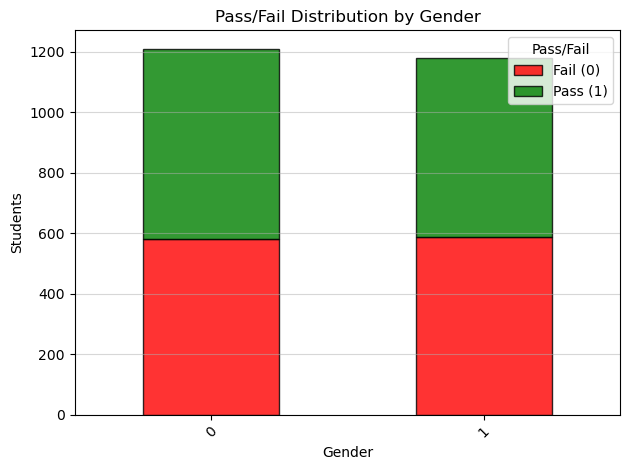

<Figure size 800x600 with 0 Axes>

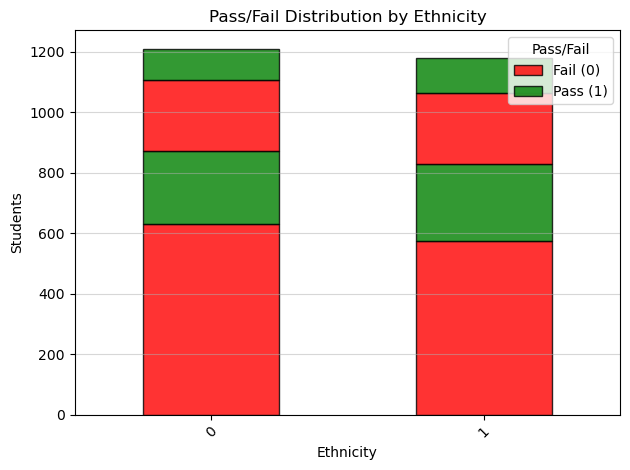

<Figure size 800x600 with 0 Axes>

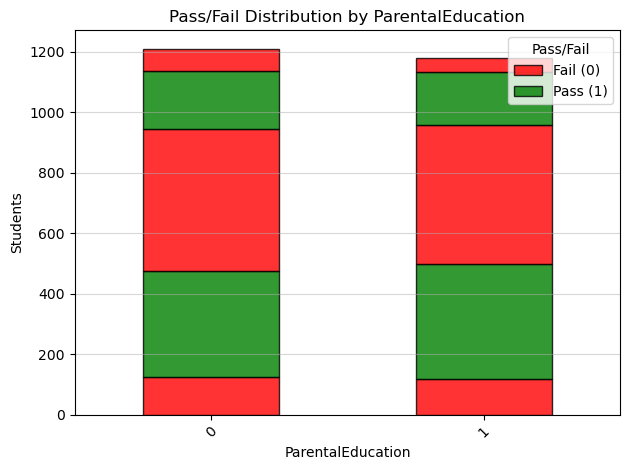

<Figure size 800x600 with 0 Axes>

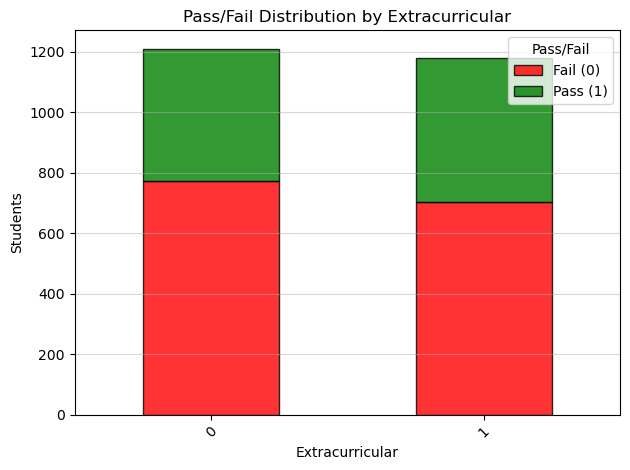

<Figure size 800x600 with 0 Axes>

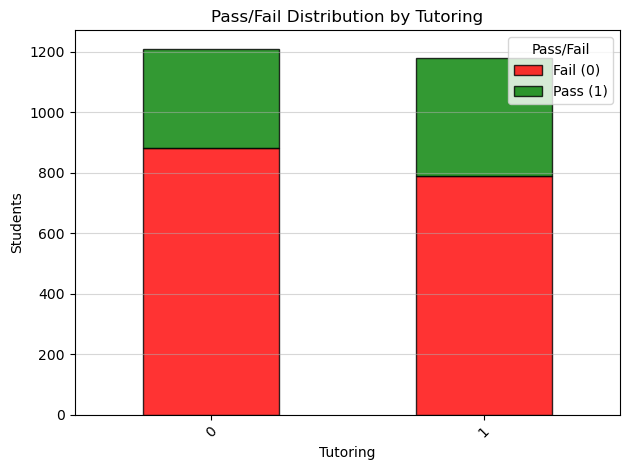

<Figure size 800x600 with 0 Axes>

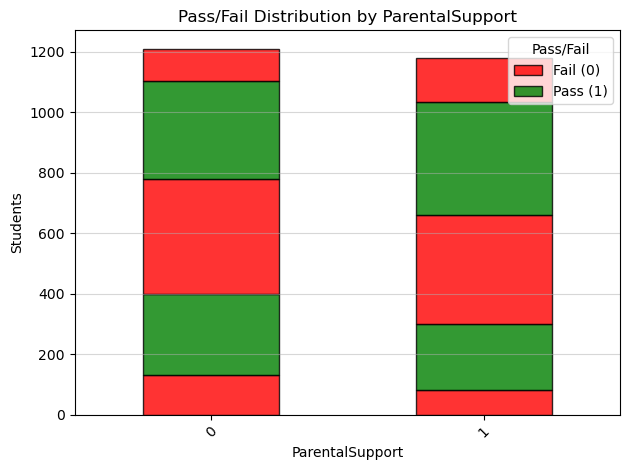

<Figure size 800x600 with 0 Axes>

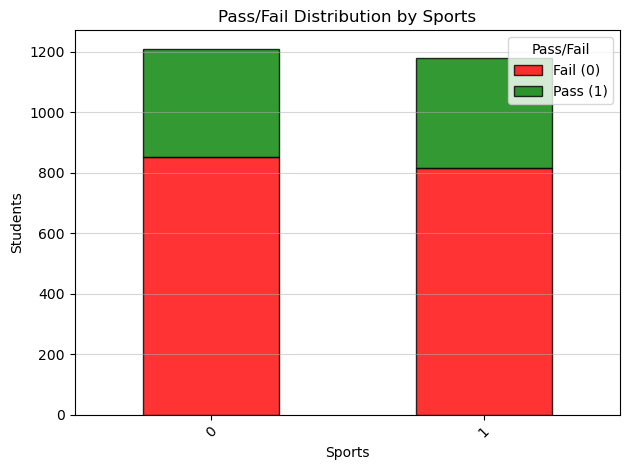

<Figure size 800x600 with 0 Axes>

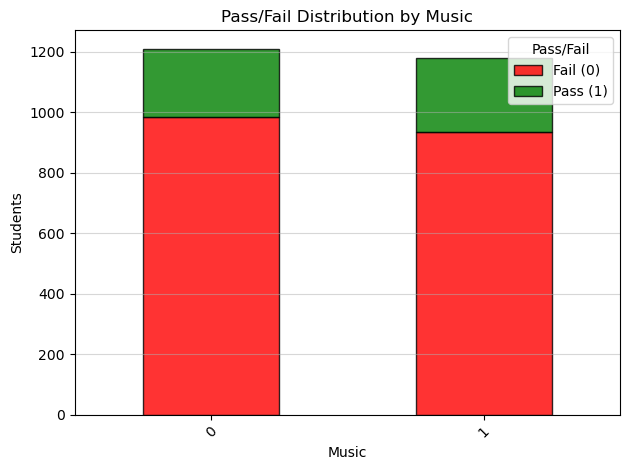

<Figure size 800x600 with 0 Axes>

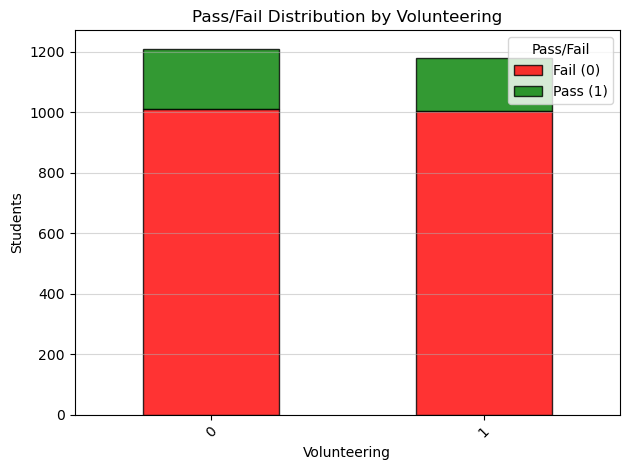

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("Student_performance_data _.csv")  

# Define categorical features
categorical_features = ["Gender", "Ethnicity", "ParentalEducation", "Extracurricular", 
                        "Tutoring", "ParentalSupport", "Sports", "Music", "Volunteering"]

# Define binary classification target (Pass = 1, Fail = 0)
df["Pass_Fail"] = df["GradeClass"].apply(lambda x: 1 if x in [0, 1, 2, 3] else 0)

# Normalize Gender labels
if "Gender" in df.columns:
    df["Gender"] = df["Gender"].astype(str).str.strip().str.capitalize()  # Capitalizes "Male", "Female"

# Function to compare categorical feature distributions for Pass/Fail
def compare_categorical_features(data):
    classes = sorted(data["Pass_Fail"].unique())  # Ensure sorted order
    print("Binary Classes found (Pass/Fail):", classes)

    for feature in categorical_features:
        if feature not in data.columns:
            print(f"Feature '{feature}' not found in dataset. Skipping...")
            continue

        # Group data and create bar chart
        plt.figure(figsize=(8, 6))
        grouped_data = data.groupby(["Pass_Fail", feature]).size().unstack(fill_value=0)

        # Define colors for Pass/Fail
        pass_fail_colors = ["red", "green"]  # Red = Fail (0), Green = Pass (1)

        # Plot stacked bar chart
        ax = grouped_data.plot(kind="bar", stacked=True, alpha=0.8, edgecolor="black", color=pass_fail_colors)

        # Add legends
        legend_1 = plt.legend(title="Pass/Fail", labels=["Fail (0)", "Pass (1)"], loc="upper right")

        # Format plot
        plt.title(f"Pass/Fail Distribution by {feature}")
        plt.xlabel(feature)
        plt.ylabel("Students")
        plt.grid(axis="y", alpha=0.5)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Compare categorical feature distributions for Pass/Fail
compare_categorical_features(df)


In [39]:
import pandas as pd


df = pd.read_csv("Student_performance_data _.csv")  


categorical_features = ["Gender", "Ethnicity", "ParentalEducation", "Extracurricular", 
                        "Tutoring", "ParentalSupport", "Sports", "Music", "Volunteering"]  
target_column = "GradeClass"  


grade_labels = {
    0: 'A (GPA >= 3.5)',
    1: 'B (3.0 <= GPA < 3.5)',
    2: 'C (2.5 <= GPA < 3.0)',
    3: 'D (2.0 <= GPA < 2.5)',
    4: 'F (GPA < 2.0)'
}


def summarize_categorical_features(data):
    summary_tables = {}  
    
    for feature in categorical_features:
        if feature not in data.columns:
            print(f"Feature {feature} not found in the dataset. Skipping...")
            continue
        
       
        grouped_data = data.groupby([target_column, feature]).size().unstack(fill_value=0)
        
        
        grouped_data.index = [grade_labels[class_label] for class_label in grouped_data.index]
        
      
        summary_tables[feature] = grouped_data
        print(f"\nSummary for {feature}:\n")
        print(grouped_data)  
    return summary_tables


categorical_summaries = summarize_categorical_features(df)



Summary for Gender:

Gender                  0    1
A (GPA >= 3.5)         58   49
B (3.0 <= GPA < 3.5)  132  137
C (2.5 <= GPA < 3.0)  197  194
D (2.0 <= GPA < 2.5)  201  213
F (GPA < 2.0)         582  629

Summary for Ethnicity:

Ethnicity               0    1    2    3
A (GPA >= 3.5)         47   24   27    9
B (3.0 <= GPA < 3.5)  136   59   47   27
C (2.5 <= GPA < 3.0)  198   79   76   38
D (2.0 <= GPA < 2.5)  194   91   86   43
F (GPA < 2.0)         632  240  234  105

Summary for ParentalEducation:

ParentalEducation       0    1    2    3   4
A (GPA >= 3.5)         11   30   48   16   2
B (3.0 <= GPA < 3.5)   27   85  108   40   9
C (2.5 <= GPA < 3.0)   42  127  156   53  13
D (2.0 <= GPA < 2.5)   39  136  150   67  22
F (GPA < 2.0)         124  350  472  191  74

Summary for Extracurricular:

Extracurricular         0    1
A (GPA >= 3.5)         52   55
B (3.0 <= GPA < 3.5)  156  113
C (2.5 <= GPA < 3.0)  229  162
D (2.0 <= GPA < 2.5)  265  149
F (GPA < 2.0)         773  438



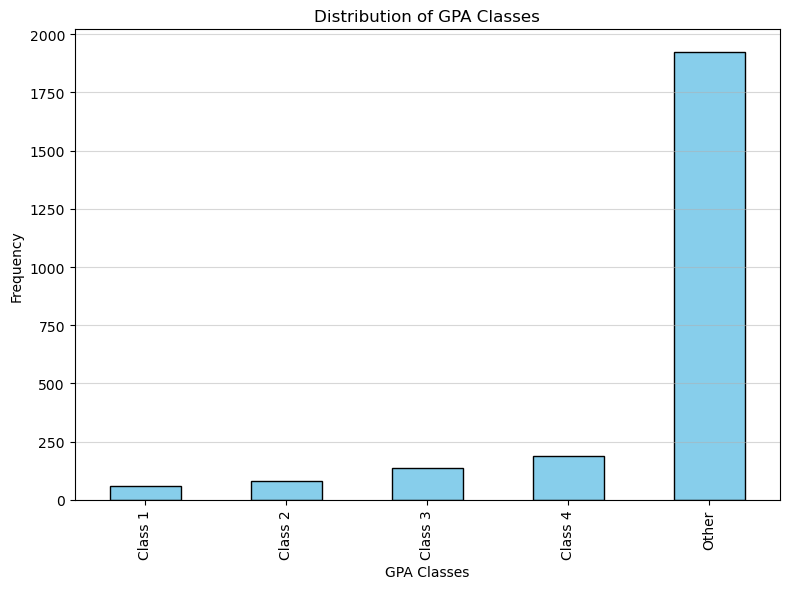

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Student_performance_data _.csv")  # Replace with your file path

# Define the regression target column
regression_target = "GPA"  # Replace with the actual column name

# Define classes based on value ranges
def categorize_regression_target(value):
    if 0.0 <= value < 0.25:
        return "Class 1"
    elif 0.25 <= value < 0.5:
        return "Class 2"
    elif 0.5 <= value < 0.75:
        return "Class 3"
    elif 0.75 <= value <= 1.0:
        return "Class 4"
    else:
        return "Other"

# Create a new column for classes
df["GPA_Class"] = df[regression_target].apply(categorize_regression_target)

# Plot histogram for the classes
plt.figure(figsize=(8, 6))
df["GPA_Class"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")

# Customize the plot
plt.title("Distribution of GPA Classes")
plt.xlabel("GPA Classes")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.5)
plt.tight_layout()
plt.show()


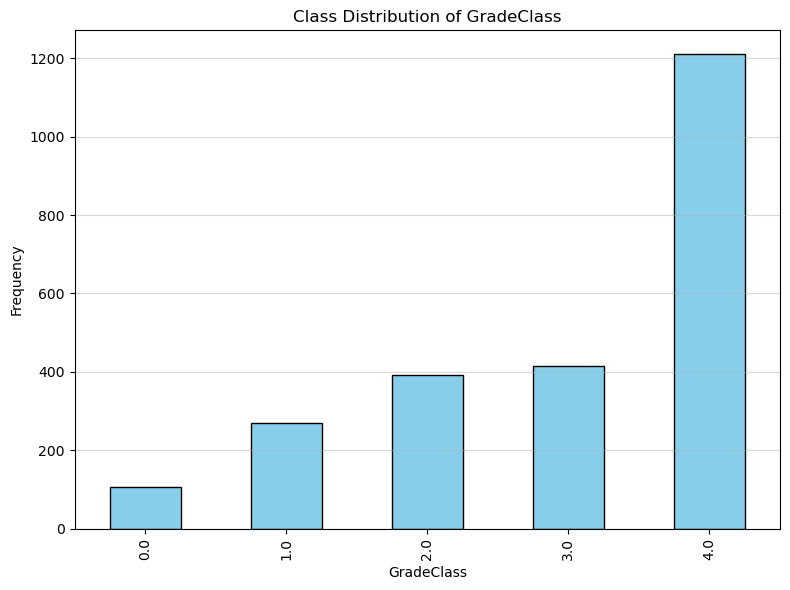

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Student_performance_data _.csv")  # Replace with your file path

# Define the classification target column
target_column = "GradeClass"  # Replace with the actual column name

# Create a histogram for the classification target
plt.figure(figsize=(8, 6))
df[target_column].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")

# Customize the plot
plt.title("Class Distribution of GradeClass")
plt.xlabel("GradeClass")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.5)
plt.tight_layout()
plt.show()


Regression Model Performance:
Mean Squared Error (MSE): 0.04
R-squared (R²): 0.96


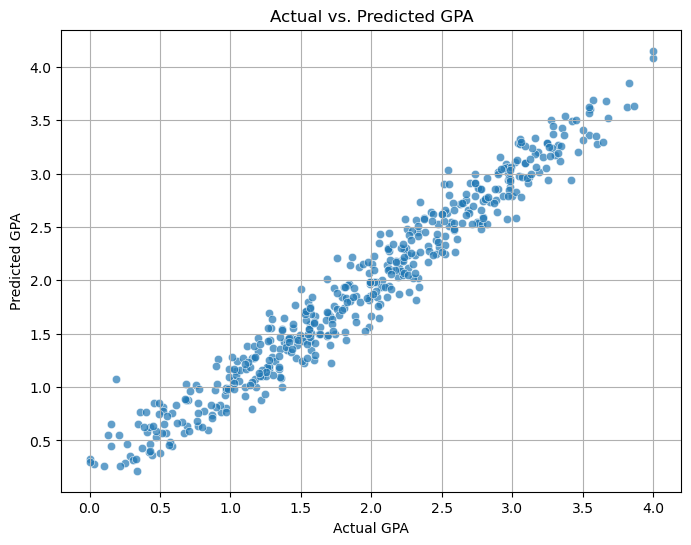

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Student_performance_data _.csv")  # Ensure correct file path

# Define features (X) and target (y)
X = df.drop(columns=["GPA"])  # Use all numerical features except GPA for prediction
y = df["GPA"]  # Target variable

# Convert categorical features using One-Hot Encoding
categorical_cols = X.select_dtypes(include=["object"]).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale numerical features for better regression performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict GPA values
y_pred = reg_model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print results
print("Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Show predicted vs actual GPA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Actual vs. Predicted GPA")
plt.grid()
plt.show()


In [6]:
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  
n_classes = y_test_bin.shape[1]  


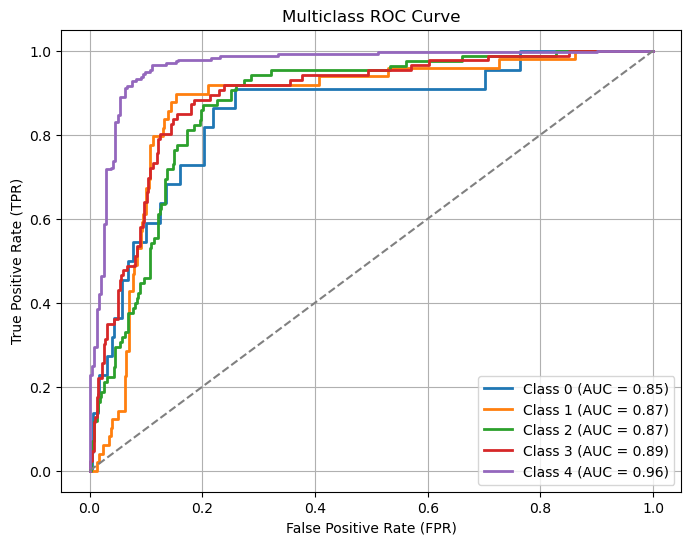

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_scores = model.predict_proba(X_test_scaled)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC = {roc_auc:.2f})")


plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Customize plot
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()
